In [2]:
import pandas as pd
import numpy as np
import sktime
import seaborn as sns
import matplotlib.pyplot as plt
from convertcsv.get_all_metrics_with_tags import get_all_metrics_with_tags
from visualization import graphs
from storage.retrieve_csv import retrieve_csv
from storage.store_csv import store_csv
from convertcsv.import_preprocess_v4 import readcsvs



In [3]:
def calculate_variance(df:pd.DataFrame) ->pd.Series:
    #The coefficient of variation
    cv = df.std() / df.mean()
    return cv.round(10).sort_values(ascending=False)


In [4]:
file_list, y = get_all_metrics_with_tags(r"F:\Master\Kubernetes\sockshop\microservices-demo\query\automated\generated_csvs_4")
initial_readings = readcsvs(file_list, reduce_NaNs_treshold=False, remove_unique_cols=False, remove_monotonic_increasing=False)


(23674, 579)


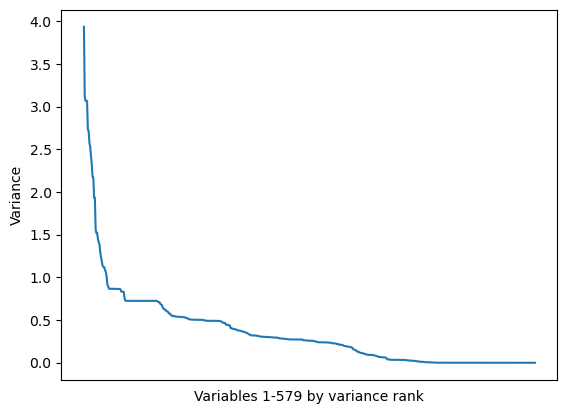

In [16]:
print(initial_readings.shape)

variances = calculate_variance(initial_readings)
variances = variances.fillna(0)

df = variances.reset_index()

df.columns = ['Variable','Variance']

ax = sns.lineplot(x='Variable',y='Variance', data=df)
plt.xticks([])
ax.set(xlabel="Variables 1-579 by variance rank")
plt.show()
